In [34]:
!pip install matplotlib
!pip install plotly
!pip install plotly-express
!pip install pandas
!pip install folium



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


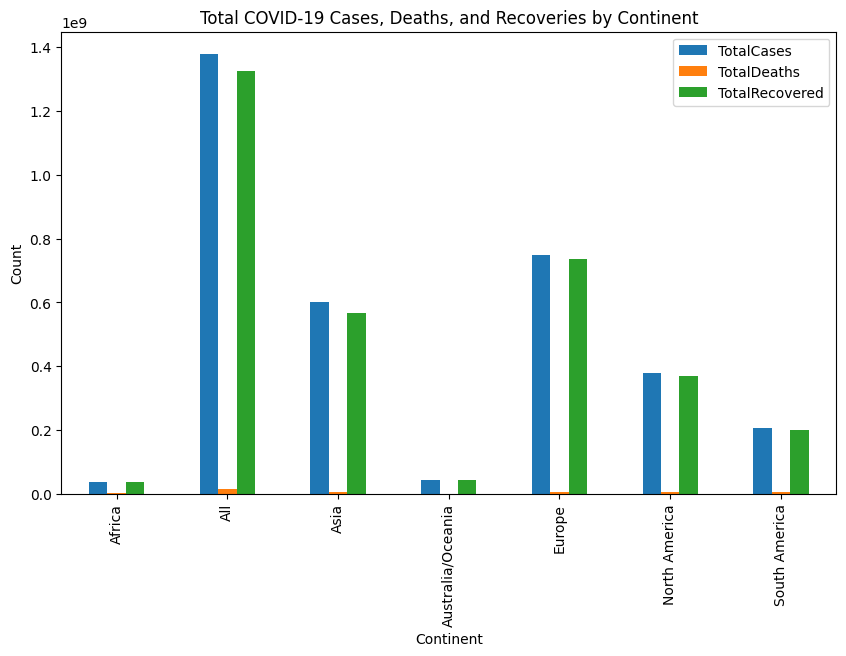

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_file.csv')

# Group the data by continent and calculate the total cases, deaths, and recoveries
continent_data = cleaned_data.groupby('Continent').sum()[['TotalCases', 'TotalDeaths', 'TotalRecovered']]

# Plot the data
continent_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Total COVID-19 Cases, Deaths, and Recoveries by Continent')

# Save the plot as a JPG file
plt.savefig('continent_data.jpg')

# Show the plot
plt.show()


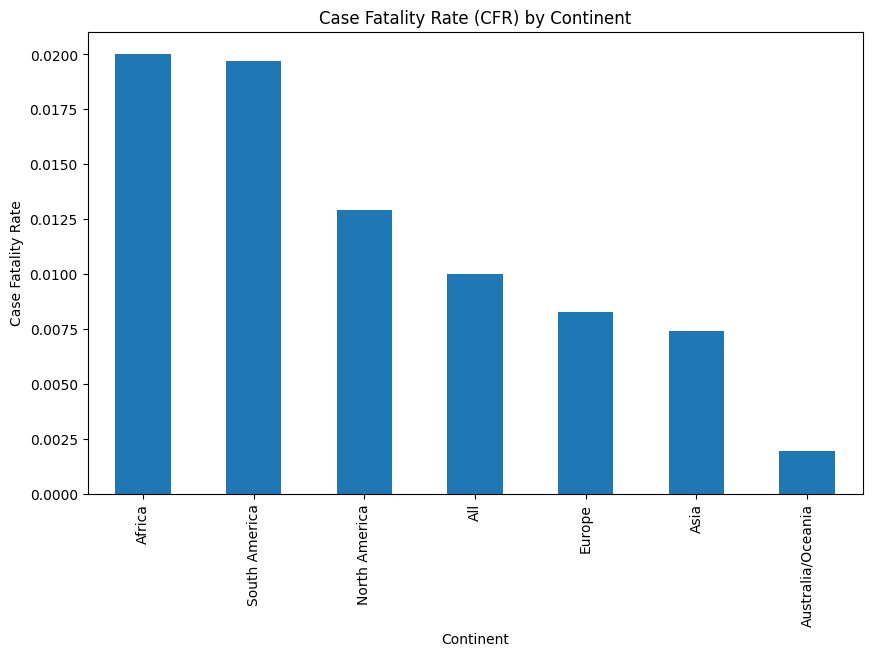

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the case fatality rate (CFR) for each continent
continent_data['CFR'] = continent_data['TotalDeaths'] / continent_data['TotalCases']

# Sort the data by CFR in descending order
continent_data.sort_values(by='CFR', ascending=False, inplace=True)

# Plot the data
continent_data['CFR'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Continent')
plt.ylabel('Case Fatality Rate')
plt.title('Case Fatality Rate (CFR) by Continent')

# Save the plot as a JPG file
plt.savefig('cfr_by_continent.jpg')

# Show the plot
plt.show()


In [14]:
# Calculate basic statistics for each continent
continent_stats = cleaned_data.groupby('Continent').agg({
    'TotalCases': 'sum',
    'TotalDeaths': 'sum',
    'TotalRecovered': 'sum'
}).reset_index()

# Display the statistics
print(continent_stats)


           Continent  TotalCases  TotalDeaths  TotalRecovered
0             Africa    37223669       745760        35139230
1                All  1380013028     13777708      1324918090
2               Asia   601884587      4463209       565651477
3  Australia/Oceania    43148523        84075        42707614
4             Europe   748206039      6189509       736453318
5      North America   379425764      4891146       368042670
6      South America   205397793      4048724       198683234


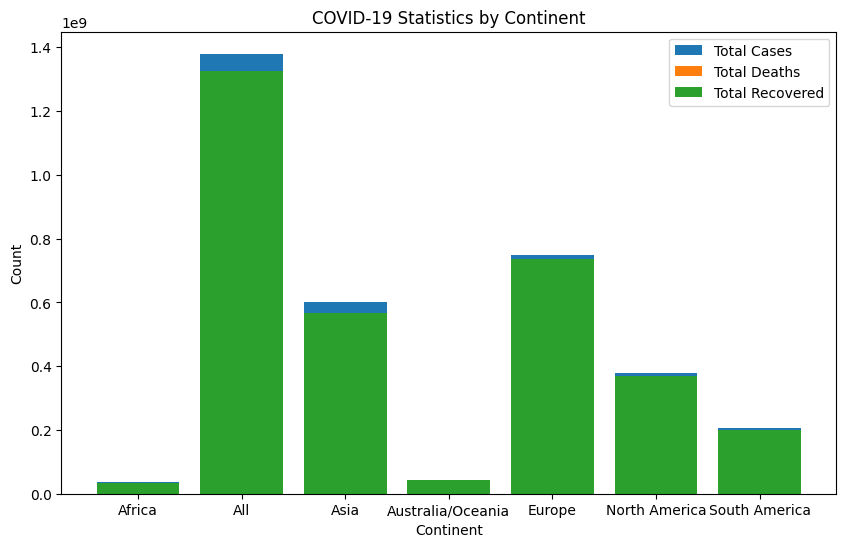

In [48]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(continent_stats['Continent'], continent_stats['TotalCases'], label='Total Cases')
plt.bar(continent_stats['Continent'], continent_stats['TotalDeaths'], label='Total Deaths')
plt.bar(continent_stats['Continent'], continent_stats['TotalRecovered'], label='Total Recovered')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('COVID-19 Statistics by Continent')

# Adding legend
plt.legend()

# Save the plot as a JPG file
plt.savefig('covid_stats_by_continent.jpg')

# Displaying the chart
plt.show()


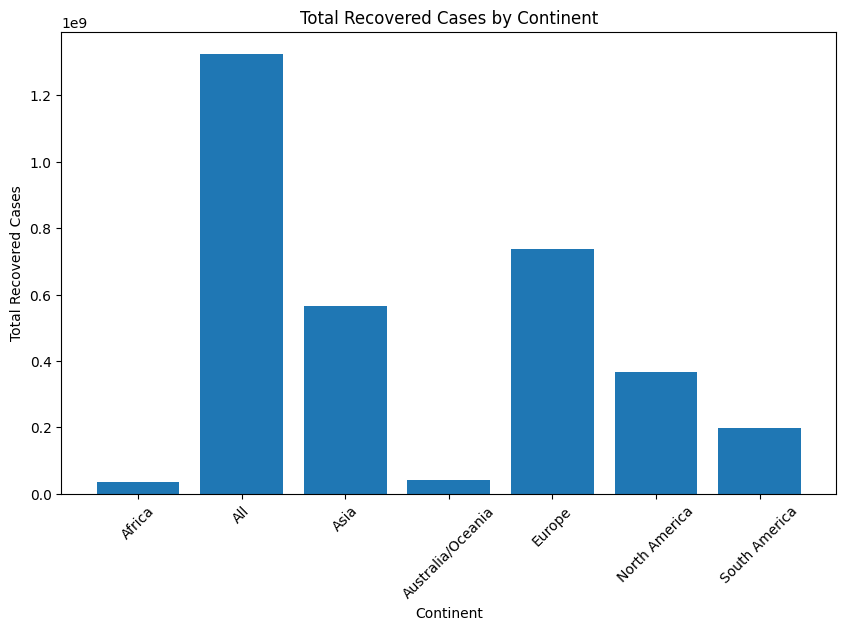

In [49]:
import matplotlib.pyplot as plt

# Total Recovered Cases by Continent
plt.figure(figsize=(10, 6))
plt.bar(continent_stats['Continent'], continent_stats['TotalRecovered'])
plt.title('Total Recovered Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Recovered Cases')
plt.xticks(rotation=45)

# Save the plot as a JPG file
plt.savefig('recovered_cases_by_continent.jpg')

# Displaying the chart
plt.show()


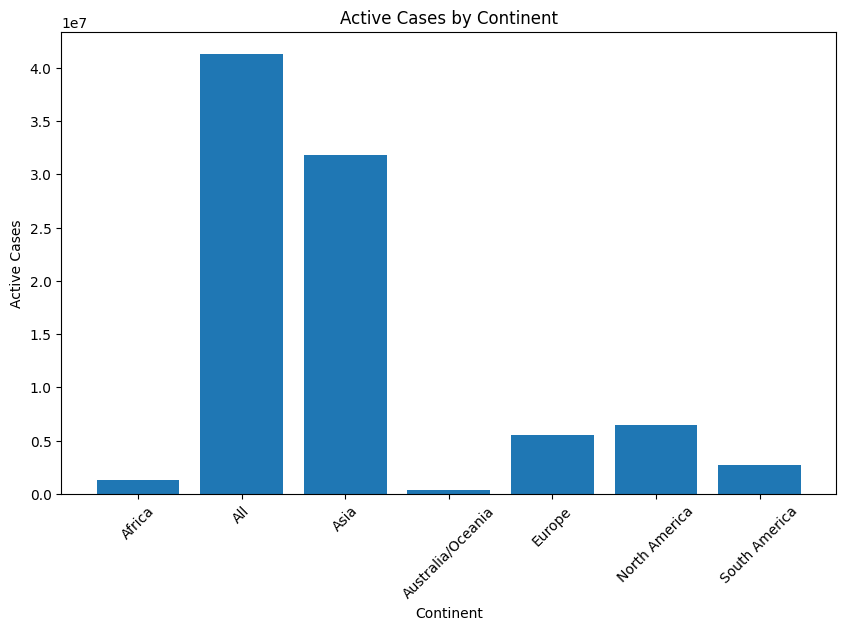

In [50]:
import matplotlib.pyplot as plt

# Calculate Active Cases by Continent
continent_stats['ActiveCases'] = continent_stats['TotalCases'] - continent_stats['TotalDeaths'] - continent_stats['TotalRecovered']

# Plot Active Cases by Continent
plt.figure(figsize=(10, 6))
plt.bar(continent_stats['Continent'], continent_stats['ActiveCases'])
plt.title('Active Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)

# Save the plot as a JPG file
plt.savefig('active_cases_by_continent.jpg')

# Display the chart
plt.show()



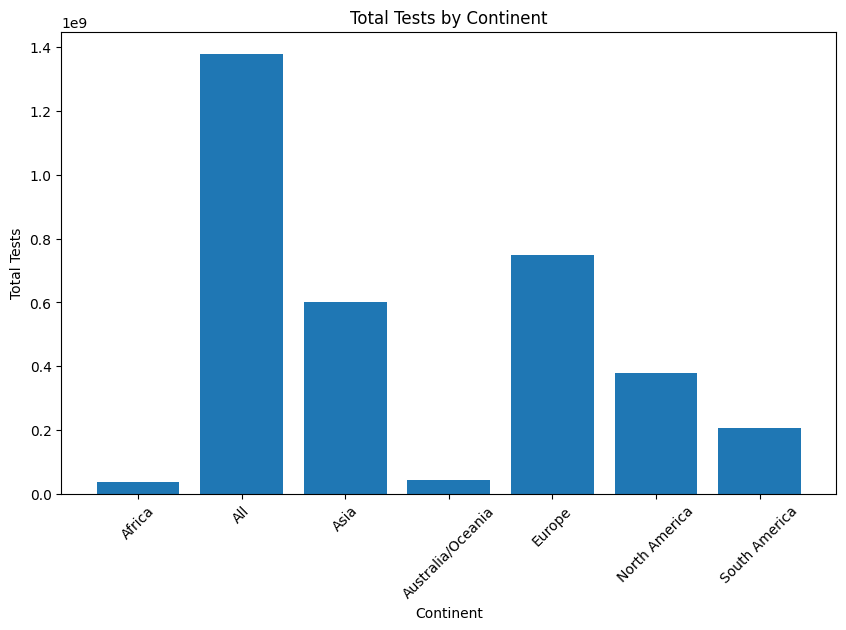

In [25]:
# Total Tests Conducted by Continent
plt.figure(figsize=(10, 6))
plt.bar(continent_stats['Continent'], continent_stats['TotalCases'])
plt.title('Total Tests by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Tests')
plt.xticks(rotation=45)
plt.show()


In [51]:
import folium
import pandas as pd

# Create a DataFrame with country/region and cases data
data = {
    'Country/Region': ['Country1', 'Country2', 'Country3'],
    'Cases': [1000, 500, 200]
}
df = pd.DataFrame(data)

# Load the country shapes GeoJSON file
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Create a folium map centered on a specific location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geojson_url,
    name='choropleth',
    data=df,
    columns=['Country/Region', 'Cases'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',  # ColorBrewer code
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Cases',
    highlight=True
).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('choropleth_map.html')

# Display the map
m
